In [137]:
import json
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta

In [138]:
data = pd.read_csv('returns.csv', index_col = 0)
data.index = pd.to_datetime(data.index)
data = data[1:]
data.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1985-01-03,NaN,0.017936,NaN,NaN,-0.012308,NaN,NaN,NaN,0.005435,0.000000,...,NaN,0.008474,NaN,-0.005971,0.000000,NaN,NaN,NaN,NaN,NaN
1985-01-04,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,-0.008403,NaN,0.000000,-0.005618,NaN,NaN,NaN,NaN,NaN
1985-01-07,NaN,-0.004405,NaN,NaN,0.012461,NaN,NaN,NaN,0.010811,0.020135,...,NaN,0.000000,NaN,-0.006006,0.008474,NaN,NaN,NaN,NaN,NaN
1985-01-08,NaN,-0.008849,NaN,NaN,-0.006154,NaN,NaN,NaN,-0.021390,0.000000,...,NaN,0.000000,NaN,-0.003021,0.000000,NaN,NaN,NaN,NaN,NaN
1985-01-09,NaN,0.026784,NaN,NaN,-0.001872,NaN,NaN,NaN,0.005464,0.000000,...,NaN,-0.004237,NaN,0.006060,0.002801,NaN,NaN,NaN,NaN,NaN


In [139]:
# data.isnull().values.any()
# cols_with_nan = data.columns[data.isna().any()]
# len(cols_with_nan)

In [140]:
# data = data.dropna(axis=1, how="any")
# data

## TODO: are returns in excess returns?

In [141]:
start = data.index[0]
start
end = start + relativedelta(months = 36)
start, end

(Timestamp('1985-01-03 00:00:00'), Timestamp('1988-01-03 00:00:00'))

In [142]:
monthly_dates = data.resample("MS").last().index
monthly_dates

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=468, freq='MS')

In [143]:
from pandas.tseries.offsets import MonthEnd, YearEnd
winnerLosers = pd.DataFrame()

for month in monthly_dates[37:]:
    end = month
    beg = month - relativedelta(months = 37)
    returns36month = data[(data.index >= beg) & (data.index < end)]
    returns36month = returns36month + 1
    cum36 = returns36month.prod() - 1

    winnerLosers[month] = cum36

winnerLosers = winnerLosers.T


/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_47179/1309513444.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  winnerLosers[month] = cum36


In [144]:
winnerLosers

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,0.000000,1.992479,0.000000,0.000000,1.557135,0.000000,0.000000,2.925917,-0.355072,0.872763,...,0.000000,0.458917,0.000000,0.790789,1.237882,0.000000,0.000000,0.000000,0.000000,0.000000
1988-03-01,0.000000,1.986244,0.000000,0.000000,1.327742,0.000000,0.000000,3.296287,-0.367442,0.736933,...,0.000000,0.547452,0.000000,0.693378,1.131572,0.000000,0.000000,0.000000,0.000000,0.000000
1988-04-01,0.000000,2.254907,0.000000,0.000000,1.070931,0.000000,0.000000,3.592583,-0.369369,0.799112,...,0.000000,0.413072,0.000000,0.696978,1.085134,0.000000,0.000000,0.000000,0.000000,0.000000
1988-05-01,0.000000,2.732113,0.000000,0.000000,0.831673,0.000000,0.000000,4.185174,-0.295598,0.880282,...,0.000000,0.506463,0.000000,0.627169,1.105941,0.000000,0.000000,0.000000,0.000000,0.000000
1988-06-01,0.000000,2.940957,0.000000,0.000000,0.921895,0.000000,0.000000,4.222211,0.072072,0.872602,...,0.000000,0.472605,0.000000,0.625311,1.086560,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.404287,1.193984,0.753127,0.051690,0.284532,1.711693,0.541165,0.254669,0.717720,1.282472,...,0.118478,0.732905,0.466339,0.092011,1.809222,0.797338,0.672404,0.218315,0.203204,0.403253
2023-09-01,0.280841,0.803225,0.760279,-0.090941,0.074443,1.499512,0.501221,0.258868,0.671058,0.995244,...,0.026240,0.353475,0.406586,-0.099683,2.120806,0.473896,0.507262,-0.070244,-0.020445,0.282328
2023-10-01,0.134801,0.350781,0.769400,-0.051828,-0.070299,1.527267,0.334059,-0.006798,0.580946,0.801071,...,0.063991,0.162589,0.061920,-0.095758,2.409713,0.175665,0.375916,-0.159708,-0.174502,0.109475
2023-11-01,0.045746,0.501224,0.850711,-0.182572,-0.081987,1.963419,0.375821,0.084885,0.422288,0.645530,...,0.178303,0.156168,0.228410,-0.063006,2.571161,0.151498,0.397315,-0.192393,-0.170443,-0.028392


In [145]:

np.floor(len(winnerLosers.iloc[0]) * 0.10)

50.0

In [146]:
import math

def top10_long_short_equal_weight(row):
    mask = (row.notna()) & (row != 0)
    ten_percent = math.floor(len(mask) * 0.10)
    top = row.nlargest(ten_percent).index
    bot = row.nsmallest(ten_percent).index
    weight = pd.Series(0, index = row.index)
    weight[top] = -1 / ten_percent
    weight[bot] = 1 / ten_percent
    return weight

In [147]:
weights = winnerLosers.apply(top10_long_short_equal_weight, axis = 1)
weights

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,0.02,-0.02,0.02,0.02,-0.02,0.02,0.02,-0.02,0.02,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
1988-03-01,0.00,-0.02,0.00,0.00,-0.02,0.00,0.00,-0.02,0.02,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
1988-04-01,0.02,-0.02,0.02,0.00,-0.02,0.00,0.00,-0.02,0.02,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
1988-05-01,0.02,-0.02,0.02,0.02,0.00,0.00,0.00,-0.02,0.02,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
1988-06-01,0.02,-0.02,0.02,0.00,0.00,0.00,0.00,-0.02,0.00,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
2023-09-01,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.02,-0.02,0.0,0.0,0.0,0.00,0.0
2023-10-01,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0
2023-11-01,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,-0.02,0.0,0.0,0.0,0.00,0.0


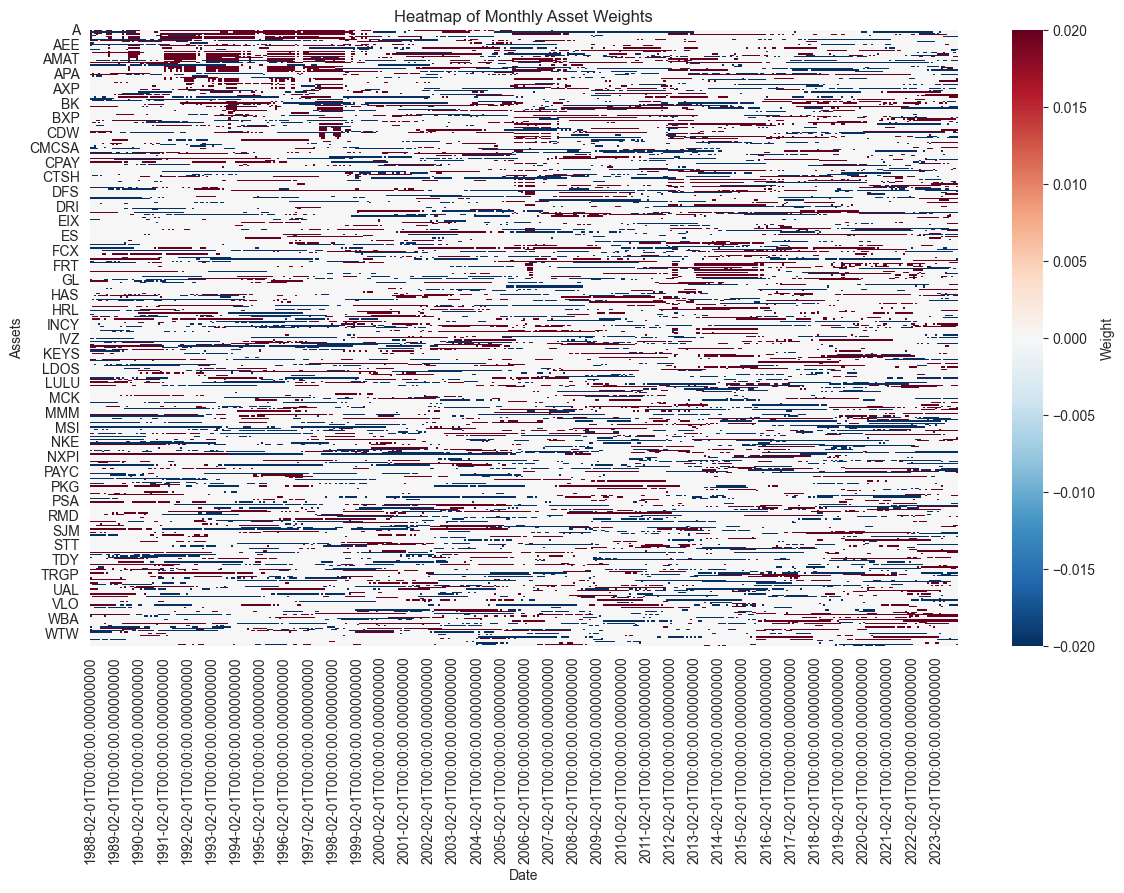

In [148]:

assets = weights.iloc[0].index

plt.figure(figsize=(14,8))
sns.heatmap(weights[assets].T,
    cmap='RdBu_r',
    cbar_kws={'label':'Weight'},
    xticklabels=12,
    # yticklabels=False
)
plt.xlabel('Date')
plt.ylabel('Assets')
plt.title('Heatmap of Monthly Asset Weights')
plt.show()



In [149]:
portfolio = pd.DataFrame()

for month in weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    portfolio = pd.concat([portfolio, ret_portfolio])
    
portfolio.columns = ["Portfolio Return"]
portfolio

,Portfolio Return
1988-02-01,-0.003608
1988-02-02,0.002350
1988-02-03,0.016368
1988-02-04,-0.000313
1988-02-05,-0.000410
...,...
2023-12-22,0.001650
2023-12-26,-0.000413
2023-12-27,0.004161
2023-12-28,0.012315


In [150]:
yearly_dates = data.resample("AS").last().index
yearly_dates = yearly_dates[4:]


In [151]:
portfolioanual = pd.DataFrame()

for year in yearly_dates:
    beg = year
    end = beg + YearEnd(0)
    ret_year = data.loc[beg:end]# filter the monthly returns for this period
    cum_year = (1 + ret_year).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_year = cum_year.shift(1)
    cum_year.iloc[0] = 1

    ini_weight = weights.loc[year] # get initial weights for the period
    year_weights = cum_year.multiply(ini_weight, axis=1)

    ret_portfolioanual = (year_weights * ret_year).sum(axis = 1)
    portfolioanual = pd.concat([portfolioanual, ret_portfolioanual])

portfolioanual.columns = ["Portfolio Return Yearly"]
portfolioanual

,Portfolio Return Yearly
1989-01-03,0.003935
1989-01-04,0.000236
1989-01-05,-0.000144
1989-01-06,0.002589
1989-01-09,0.003301
...,...
2023-12-22,0.001346
2023-12-26,-0.003748
2023-12-27,-0.000611
2023-12-28,0.013912


<Axes: >

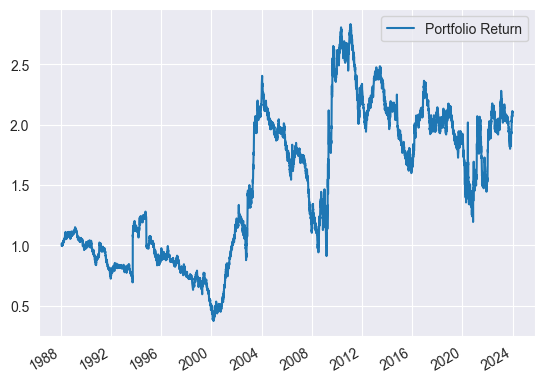

In [152]:
cum_returns = (1 + portfolio).cumprod()
cum_returns.plot()

In [153]:
mupor = portfolio.mean() * 252
sdpor = portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: 0.04358676388639528
Std: 0.21885802240389352
Sharpe: 0.1991554314877144


<Axes: >

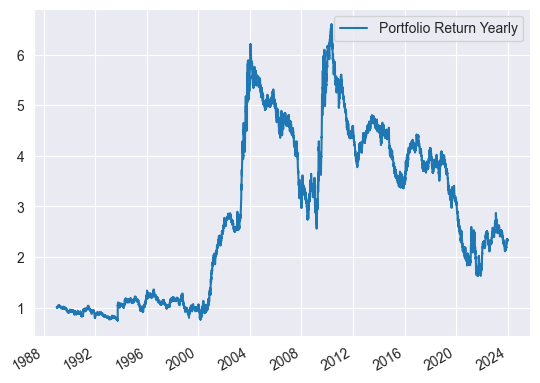

In [154]:
anual_cum_returns = (1 + portfolioanual).cumprod()
anual_cum_returns.plot()

In [156]:
mupor_year = portfolioanual.mean() * 252
sdpor_year = portfolioanual.std() * np.sqrt(252)
srpor_year = mupor_year / sdpor_year

print(f"Mu: {mupor_year[0]}")
print(f"Std: {sdpor_year[0]}")
print(f"Sharpe: {srpor_year[0]}")

Mu: 0.04458570342126712
Std: 0.203575181790219
Sharpe: 0.21901345256914462
